# Some regularizations on [California Housing Values](https://github.com/ageron/handson-ml/tree/master/datasets/housing) dataset
By [Zahra Taheri](https://github.com/zahta), November 5, 2020

### Import libraries

In [1]:
#For some basic operations
import numpy as np
import pandas as pd
import torch
import torch.nn as nn

#For visualizations
import matplotlib as mpl
import matplotlib.pyplot as plt

# to make this notebook's output identical at every run
#np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

## Reading the dataset

In [2]:
data=pd.read_csv('housing.csv')
data.shape

(20640, 10)

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Descriptive statistics and data visualizations

In [5]:
#Describe the dataset

data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
#Check the no. of unique items in each categorical column

data.select_dtypes('object').nunique()

ocean_proximity    5
dtype: int64

In [7]:
# Percentage of missing data in each column

number_of_columns = data.shape[0]
percentage_of_missing_data = data.isnull().sum()/number_of_columns
print(percentage_of_missing_data)

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


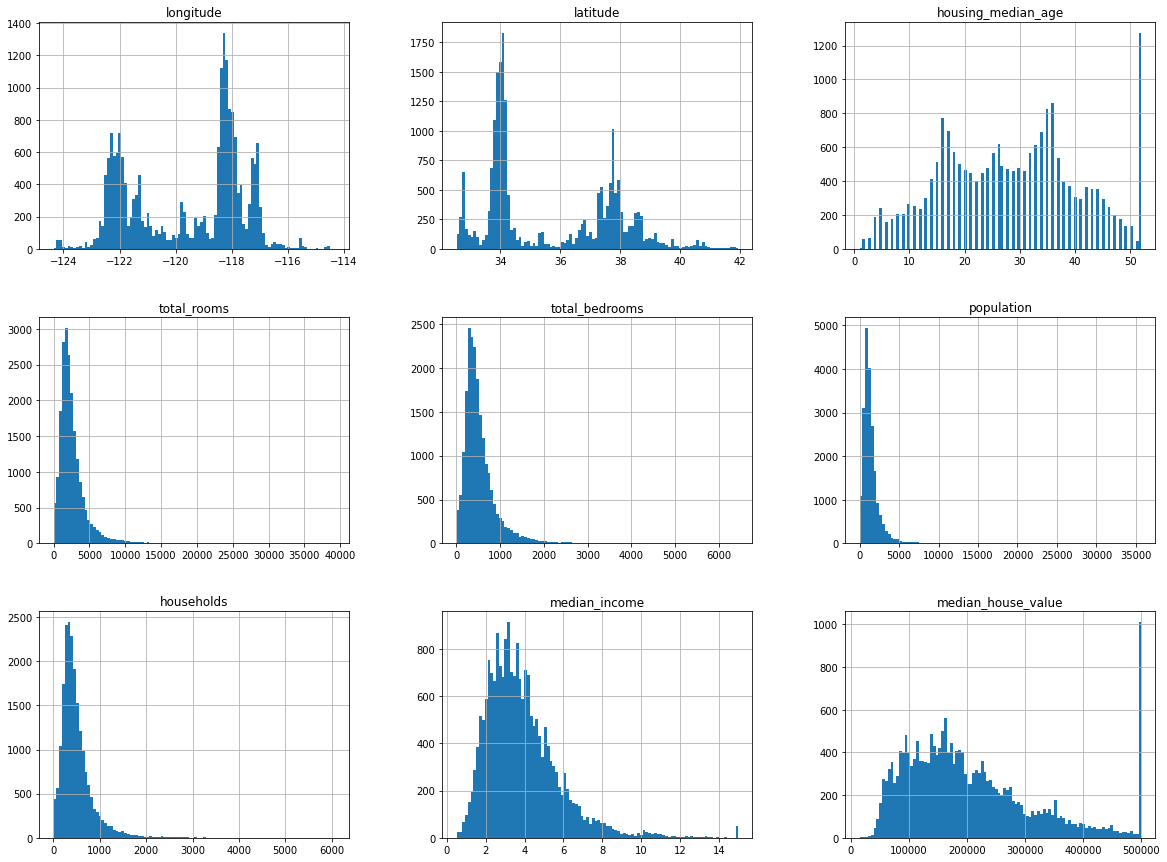

In [8]:
data.hist(bins=100, figsize=(20,15))

plt.show()

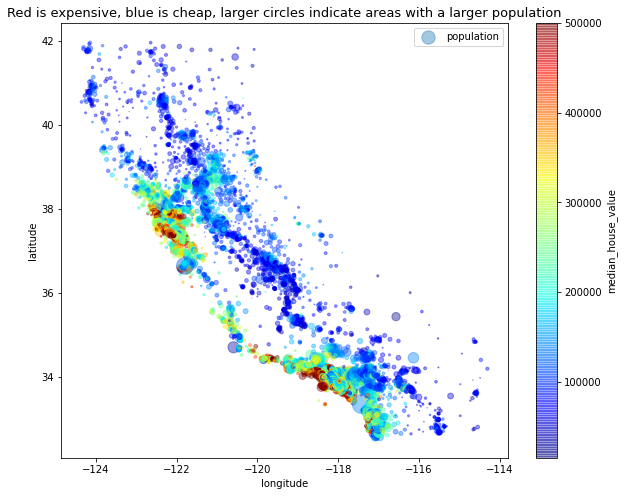

In [9]:
data.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
    s=data["population"]/100, label="population", figsize=(10,8),
    c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.title('Red is expensive, blue is cheap, larger circles indicate areas with a larger population',\
          fontweight = 20, fontsize = 13)
plt.legend()

In [10]:
corr_matrix = data.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

## Data Cleaning and Preparation

In [11]:
#Fill in missing values with median

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [12]:
#Remove the text attribute because median can only be calculated on numerical attributes:
data_num=data.drop("ocean_proximity", axis=1)

In [13]:
imputer.fit(data_num)
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [14]:
X = imputer.transform(data_num)
data_num_clean = pd.DataFrame(X, columns=data_num.columns,index=data_num.index)
data_num_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [15]:
data_num_clean["rooms_per_household"] = data_num_clean["total_rooms"]/data_num_clean["households"]
data_num_clean["bedrooms_per_room"] = data_num_clean["total_bedrooms"]/data_num_clean["total_rooms"]
data_num_clean["population_per_household"]=data_num_clean["population"]/data_num_clean["households"]

In [16]:
#Preprocess the categorical input feature, `ocean_proximity`:
data_cat = data[["ocean_proximity"]]

In [17]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
data_cat_encoded = ordinal_encoder.fit_transform(data_cat)

In [18]:
data_num_clean["ocean_proximity"]=data_cat_encoded
data_clean=data_num_clean
data_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467,3.0


In [19]:
housing_labels = data_clean["median_house_value"]
data_clean = data_clean.drop("median_house_value", axis=1)
data_clean["median_house_value"] = housing_labels
data_clean

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,6.984127,0.146591,2.555556,3.0,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,6.238137,0.155797,2.109842,3.0,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,8.288136,0.129516,2.802260,3.0,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,5.817352,0.184458,2.547945,3.0,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,6.281853,0.172096,2.181467,3.0,342200.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,5.045455,0.224625,2.560606,1.0,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,6.114035,0.215208,3.122807,1.0,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,5.205543,0.215173,2.325635,1.0,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,5.329513,0.219892,2.123209,1.0,84700.0


In [20]:
from sklearn import preprocessing

minmax_scale = preprocessing.MinMaxScaler()
X_scaled = minmax_scale.fit_transform(data_clean)
X_scaled.shape

(20640, 13)

In [21]:
#Splitting the dependent and independent variables

X = X_scaled[:,:-1]
y = X_scaled[:,-1]

print(X.shape)
print(y.shape)

(20640, 12)
(20640,)


In [22]:
#Splitting the dataset into training and test sets

from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)

(16512, 12)
(16512,)
(4128, 12)


In [23]:
train_data = train_data
test_data = test_data
train_labels = train_labels.reshape(-1,1)
test_labels = test_labels.reshape(-1,1)

In [24]:
train_labels

array([[0.18144461],
       [0.75690616],
       [0.32494918],
       ...,
       [0.42701061],
       [0.55360803],
       [0.63917468]])

## Preparation of the dataset for PyTorch

In [25]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [26]:
from torch.utils.data import TensorDataset, DataLoader

tensor_x = torch.tensor(train_data, dtype=torch.float).to(device) # transform to torch tensor
tensor_x2 = torch.tensor(test_data, dtype=torch.float).to(device) 

In [27]:
tensor_y = torch.tensor(train_labels, dtype=torch.float).to(device)
tensor_y2 = torch.tensor(test_labels, dtype=torch.float).to(device)

In [28]:
train_dataset = TensorDataset(tensor_x, tensor_y) # create your dataset
test_dataset = TensorDataset(tensor_x2,tensor_y2)

In [29]:
# Normalizing the data

#print(tensor_x,tensor_x2)

#mean = torch.mean(tensor_x)
#std = torch.std(tensor_x)

#tensor_x = (tensor_x - mean) / std
#tensor_x2 = (tensor_x2 - mean) / std

## Building Feedforward Neural Networks with PyTorch

In [30]:
# import libraries

import torch
import torch.nn as nn
from torch.autograd import Variable
from torchsummary import summary

## L2 regularization

### Model A: 3 Hidden Layers Feedforward Neural Network

### Create model class

In [31]:
batch_size = 128
n_iters = 10000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

77


In [32]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [33]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1,hidden_dim2,hidden_dim3, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.linear4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        out = self.linear1(x).clamp(min=0)
        out = self.linear2(out).clamp(min=0)
        out = self.linear3(out).clamp(min=0)
        out = self.linear4(out)
        return out

In [34]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 500
hidden_dim2 = 1000
hidden_dim3 = 200

In [35]:
model = FNN(input_dim, hidden_dim1,hidden_dim2,hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [36]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]           6,500
            Linear-2              [-1, 1, 1000]         501,000
            Linear-3               [-1, 1, 200]         200,200
            Linear-4                 [-1, 1, 1]             201
Total params: 707,901
Trainable params: 707,901
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 2.70
Estimated Total Size (MB): 2.71
----------------------------------------------------------------


In [37]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.0001
LAMBDA = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

In [38]:
# Train the model

train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
                
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 5.4456281661987305. Test Loss: 1.670966625213623
Iteration: 1000. Training Loss: 4.148662567138672. Test Loss: 0.8941614031791687
Iteration: 1500. Training Loss: 2.738175392150879. Test Loss: 0.45020073652267456
Iteration: 2000. Training Loss: 2.285991668701172. Test Loss: 0.4465404748916626
Iteration: 2500. Training Loss: 2.4436302185058594. Test Loss: 0.3793649673461914
Iteration: 3000. Training Loss: 3.5847272872924805. Test Loss: 0.3928441107273102
Iteration: 3500. Training Loss: 3.704059600830078. Test Loss: 0.36960262060165405
Iteration: 4000. Training Loss: 1.5463796854019165. Test Loss: 0.3387115001678467
Iteration: 4500. Training Loss: 3.8603334426879883. Test Loss: 0.380603551864624
Iteration: 5000. Training Loss: 1.9281309843063354. Test Loss: 0.3294564485549927
Iteration: 5500. Training Loss: 2.2389883995056152. Test Loss: 0.3439469635486603
Iteration: 6000. Training Loss: 2.6810760498046875. Test Loss: 0.3570362627506256
Iteration: 6500. Trai

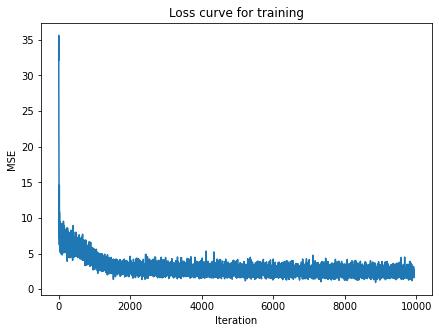

In [39]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()

In [40]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'housing_FNN_pytorch_A_l2.pkl')# only save parameters

### Model B: 3 Hidden Layers Feedforward Neural Network (ReLU activation)

### Create model class

In [41]:
batch_size = 16
n_iters = 21000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

20


In [42]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [43]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1,hidden_dim2,hidden_dim3, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        return out

In [44]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 500
hidden_dim2 = 1000
hidden_dim3 = 200

In [45]:
model = FNN(input_dim, hidden_dim1,hidden_dim2,hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [46]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]           6,500
              ReLU-2               [-1, 1, 500]               0
            Linear-3              [-1, 1, 1000]         501,000
              ReLU-4              [-1, 1, 1000]               0
            Linear-5               [-1, 1, 200]         200,200
              ReLU-6               [-1, 1, 200]               0
            Linear-7                 [-1, 1, 1]             201
Total params: 707,901
Trainable params: 707,901
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.03
Params size (MB): 2.70
Estimated Total Size (MB): 2.73
----------------------------------------------------------------


In [47]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.0001
LAMBDA = 0.05
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

In [48]:
# Train the model

train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
                
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 0.23747478425502777. Test Loss: 1.4503998756408691
Iteration: 1000. Training Loss: 0.8087143898010254. Test Loss: 1.3748252391815186
Iteration: 1500. Training Loss: 0.8851361870765686. Test Loss: 1.3379799127578735
Iteration: 2000. Training Loss: 1.3978710174560547. Test Loss: 1.2949652671813965
Iteration: 2500. Training Loss: 1.247320294380188. Test Loss: 1.2609012126922607
Iteration: 3000. Training Loss: 1.5314319133758545. Test Loss: 1.2172132730484009
Iteration: 3500. Training Loss: 0.5148290395736694. Test Loss: 1.180030345916748
Iteration: 4000. Training Loss: 1.0512583255767822. Test Loss: 1.1336677074432373
Iteration: 4500. Training Loss: 0.921399712562561. Test Loss: 1.0907514095306396
Iteration: 5000. Training Loss: 0.9150222539901733. Test Loss: 1.0377575159072876
Iteration: 5500. Training Loss: 0.7955772280693054. Test Loss: 0.975710391998291
Iteration: 6000. Training Loss: 0.4389723539352417. Test Loss: 0.9202583432197571
Iteration: 6500. Tra

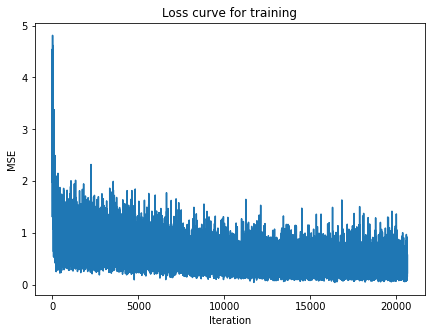

In [49]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()


In [50]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'housing_FNN_pytorch_B_l2.pkl')# only save parameters

### Model C: 3 Hidden Layers Feedforward Neural Network (LeakyReLU activation)

### Create model class

In [51]:
batch_size = 16
n_iters = 40000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

38


In [52]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [53]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1,hidden_dim2,hidden_dim3, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.LeakyReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.LeakyReLU()
        self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.LeakyReLU()
        self.linear4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        return out

In [54]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 500
hidden_dim2 = 1000
hidden_dim3 = 100

In [55]:
model = FNN(input_dim, hidden_dim1,hidden_dim2,hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [56]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]           6,500
         LeakyReLU-2               [-1, 1, 500]               0
            Linear-3              [-1, 1, 1000]         501,000
         LeakyReLU-4              [-1, 1, 1000]               0
            Linear-5               [-1, 1, 100]         100,100
         LeakyReLU-6               [-1, 1, 100]               0
            Linear-7                 [-1, 1, 1]             101
Total params: 607,701
Trainable params: 607,701
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.32
Estimated Total Size (MB): 2.34
----------------------------------------------------------------


In [57]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.0001
LAMBDA = 0.08
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

In [58]:
# Train the model

train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
                
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 0.46467915177345276. Test Loss: 1.4899134635925293
Iteration: 1000. Training Loss: 0.7538909912109375. Test Loss: 1.4159109592437744
Iteration: 1500. Training Loss: 1.3516013622283936. Test Loss: 1.3674253225326538
Iteration: 2000. Training Loss: 1.5755720138549805. Test Loss: 1.3155851364135742
Iteration: 2500. Training Loss: 0.8613793849945068. Test Loss: 1.2730125188827515
Iteration: 3000. Training Loss: 0.5130013227462769. Test Loss: 1.2154728174209595
Iteration: 3500. Training Loss: 0.3315894603729248. Test Loss: 1.1655049324035645
Iteration: 4000. Training Loss: 0.48518192768096924. Test Loss: 1.112382173538208
Iteration: 4500. Training Loss: 0.8902237415313721. Test Loss: 1.0564403533935547
Iteration: 5000. Training Loss: 0.8662206530570984. Test Loss: 0.9999403357505798
Iteration: 5500. Training Loss: 0.5740669369697571. Test Loss: 0.9385604858398438
Iteration: 6000. Training Loss: 1.0364590883255005. Test Loss: 0.8831520080566406
Iteration: 6500.

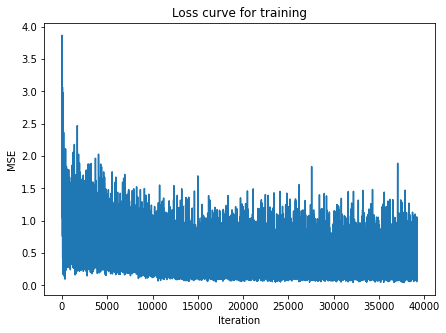

In [59]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()

In [60]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'housing_FNN_pytorch_C_l2.pkl')# only save parameters

### Model D: 5 Hidden Layers Feedforward Neural Network

### Create model class

In [61]:
batch_size = 16
n_iters = 40000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

38


In [62]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [63]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, hidden_dim5, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim3, hidden_dim4)
        self.relu4 = nn.ReLU()
        self.linear5 = nn.Linear(hidden_dim4, hidden_dim5)
        self.relu5 = nn.ReLU()
        self.linear6 = nn.Linear(hidden_dim5, output_dim)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        out = self.linear5(out)
        out = self.relu5(out)
        out = self.linear6(out)
        return out
    

In [64]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 500
hidden_dim2 = 1000
hidden_dim3 = 200
hidden_dim4 = 100
hidden_dim5 = 10

In [65]:
model = FNN(input_dim, hidden_dim1,hidden_dim2,hidden_dim3,hidden_dim4,hidden_dim5, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [66]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]           6,500
              ReLU-2               [-1, 1, 500]               0
            Linear-3              [-1, 1, 1000]         501,000
              ReLU-4              [-1, 1, 1000]               0
            Linear-5               [-1, 1, 200]         200,200
              ReLU-6               [-1, 1, 200]               0
            Linear-7               [-1, 1, 100]          20,100
              ReLU-8               [-1, 1, 100]               0
            Linear-9                [-1, 1, 10]           1,010
             ReLU-10                [-1, 1, 10]               0
           Linear-11                 [-1, 1, 1]              11
Total params: 728,821
Trainable params: 728,821
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [67]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.001
LAMBDA = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay=LAMBDA)

In [68]:
# Train the model

train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
                
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 0.6620798110961914. Test Loss: 1.5132237672805786
Iteration: 1000. Training Loss: 1.2192797660827637. Test Loss: 1.4831407070159912
Iteration: 1500. Training Loss: 1.0602871179580688. Test Loss: 1.449840784072876
Iteration: 2000. Training Loss: 0.9160999059677124. Test Loss: 1.3953616619110107
Iteration: 2500. Training Loss: 0.45973730087280273. Test Loss: 1.3004310131072998
Iteration: 3000. Training Loss: 0.8752965927124023. Test Loss: 1.0321450233459473
Iteration: 3500. Training Loss: 0.3504965901374817. Test Loss: 0.42577266693115234
Iteration: 4000. Training Loss: 0.5312381982803345. Test Loss: 0.17760756611824036
Iteration: 4500. Training Loss: 0.3385029733181. Test Loss: 0.201055645942688
Iteration: 5000. Training Loss: 0.39469802379608154. Test Loss: 0.1731964498758316
Iteration: 5500. Training Loss: 0.1621721088886261. Test Loss: 0.14211571216583252
Iteration: 6000. Training Loss: 0.18979772925376892. Test Loss: 0.13436710834503174
Iteration: 6500

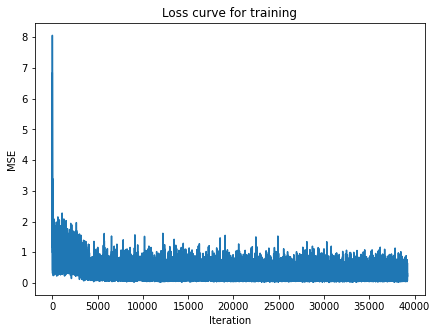

In [69]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()

In [70]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'housing_FNN_pytorch_D_l2.pkl')# only save parameters

## L1 regularization

### Model C: 3 Hidden Layers Feedforward Neural Network (LeakyReLU activation)

### Create model class

In [71]:
batch_size = 16
n_iters = 40000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

38


In [72]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [73]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1,hidden_dim2,hidden_dim3, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.LeakyReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.LeakyReLU()
        self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.LeakyReLU()
        self.linear4 = nn.Linear(hidden_dim3, output_dim)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        return out

In [74]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 500
hidden_dim2 = 1000
hidden_dim3 = 100

In [75]:
model = FNN(input_dim, hidden_dim1,hidden_dim2,hidden_dim3, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [76]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]           6,500
         LeakyReLU-2               [-1, 1, 500]               0
            Linear-3              [-1, 1, 1000]         501,000
         LeakyReLU-4              [-1, 1, 1000]               0
            Linear-5               [-1, 1, 100]         100,100
         LeakyReLU-6               [-1, 1, 100]               0
            Linear-7                 [-1, 1, 1]             101
Total params: 607,701
Trainable params: 607,701
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.02
Params size (MB): 2.32
Estimated Total Size (MB): 2.34
----------------------------------------------------------------


In [77]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [78]:
# Train the model

LAMBDA = 0.5
train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
        '''
        L1 regularization
        '''
        l1_regularization = torch.tensor(0).long().to(device)
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1).long().to(device)
            
        loss += LAMBDA * l1_regularization        
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 6868.06884765625. Test Loss: 0.9095872640609741
Iteration: 1000. Training Loss: 6871.48876953125. Test Loss: 0.30802541971206665
Iteration: 1500. Training Loss: 6873.83544921875. Test Loss: 0.2532705068588257
Iteration: 2000. Training Loss: 6874.9970703125. Test Loss: 0.21095658838748932
Iteration: 2500. Training Loss: 6874.8720703125. Test Loss: 0.16493752598762512
Iteration: 3000. Training Loss: 6875.146484375. Test Loss: 0.15666328370571136
Iteration: 3500. Training Loss: 6876.2333984375. Test Loss: 0.15204669535160065
Iteration: 4000. Training Loss: 6876.1484375. Test Loss: 0.14821654558181763
Iteration: 4500. Training Loss: 6876.890625. Test Loss: 0.1669633388519287
Iteration: 5000. Training Loss: 6877.3251953125. Test Loss: 0.17799502611160278
Iteration: 5500. Training Loss: 6877.78759765625. Test Loss: 0.18387003242969513
Iteration: 6000. Training Loss: 6877.76611328125. Test Loss: 0.16798317432403564
Iteration: 6500. Training Loss: 6878.2221679687

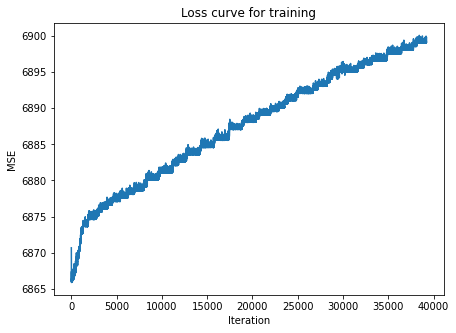

In [79]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()

In [80]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'housing_FNN_pytorch_C_l1.pkl')# only save parameters

### Model D: 5 Hidden Layers Feedforward Neural Network

### Create model class

In [81]:
batch_size = 16
n_iters = 40000
num_epochs = n_iters / (len(train_data) / batch_size)
num_epochs = int(num_epochs)
print(num_epochs)

38


In [82]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True) # create your dataloader

test_loader = DataLoader(test_dataset, batch_size=batch_size,  shuffle=False)

In [83]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, hidden_dim3, hidden_dim4, hidden_dim5, output_dim):
        super(FNN, self).__init__()
        
        self.linear1 = nn.Linear(input_dim, hidden_dim1)
        self.relu1 = nn.ReLU()
        self.linear2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.relu2 = nn.ReLU()
        self.linear3 = nn.Linear(hidden_dim2, hidden_dim3)
        self.relu3 = nn.ReLU()
        self.linear4 = nn.Linear(hidden_dim3, hidden_dim4)
        self.relu4 = nn.ReLU()
        self.linear5 = nn.Linear(hidden_dim4, hidden_dim5)
        self.relu5 = nn.ReLU()
        self.linear6 = nn.Linear(hidden_dim5, output_dim)
        
    def forward(self, x):
        out = self.linear1(x)
        out = self.relu1(out)
        out = self.linear2(out)
        out = self.relu2(out)
        out = self.linear3(out)
        out = self.relu3(out)
        out = self.linear4(out)
        out = self.relu4(out)
        out = self.linear5(out)
        out = self.relu5(out)
        out = self.linear6(out)
        return out
    

In [84]:
input_dim = tensor_x.shape[1]
output_dim = 1
hidden_dim1 = 500
hidden_dim2 = 1000
hidden_dim3 = 200
hidden_dim4 = 100
hidden_dim5 = 10

In [85]:
model = FNN(input_dim, hidden_dim1,hidden_dim2,hidden_dim3,hidden_dim4,hidden_dim5, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################
if torch.cuda.is_available():
    model.cuda()


In [86]:
summary(model, (1,tensor_x.shape[1]))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1               [-1, 1, 500]           6,500
              ReLU-2               [-1, 1, 500]               0
            Linear-3              [-1, 1, 1000]         501,000
              ReLU-4              [-1, 1, 1000]               0
            Linear-5               [-1, 1, 200]         200,200
              ReLU-6               [-1, 1, 200]               0
            Linear-7               [-1, 1, 100]          20,100
              ReLU-8               [-1, 1, 100]               0
            Linear-9                [-1, 1, 10]           1,010
             ReLU-10                [-1, 1, 10]               0
           Linear-11                 [-1, 1, 1]              11
Total params: 728,821
Trainable params: 728,821
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/

In [87]:
criterion = nn.MSELoss(reduction='sum')

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [88]:
# Train the model

LAMBDA = 0.09
train_loss = []

iter = 0
for epoch in range(num_epochs):
    
    '''
    One iteration
    '''
    for i, (X, labels) in enumerate(train_loader):
        #######################
        #  USE GPU FOR MODEL  #
        #######################
        if torch.cuda.is_available():
            X = Variable(X.cuda())
            labels = Variable(labels.cuda())
        else:
            X = Variable(X)
            labels = Variable(labels)
        
        # Forward pass to get output/logits
        outputs = model(X)
        
        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()
        
        # Calculate Loss:
        loss = criterion(outputs, labels)
        '''
        L1 regularization
        '''
        l1_regularization = torch.tensor(0).long().to(device)
        for param in model.parameters():
            l1_regularization += torch.norm(param, 1).long().to(device)
            
        loss += LAMBDA * l1_regularization        
        '''
        Save loss to draw loss curve
        '''
        train_loss.append(loss)
        ''''''

        # Getting gradients w.r.t. parameters
        loss.backward()
        
        # Updating parameters
        optimizer.step()
        ''''''
        
        iter += 1
    
        # Testing the model
        if iter % 500 == 0:
            # Iterate through test dataset
            for X, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                if torch.cuda.is_available():
                    X = Variable(X.cuda())
                else:
                    X = Variable(X)    
                    
                # Forward pass only to get logits/output
                outputs = model(X)
                
                # Calculate Loss:
                loss_t = criterion(outputs, labels)
                
            # Print Loss
            print('Iteration: {}. Training Loss: {}. Test Loss: {}'.format(iter, loss.data, loss_t.data))
            

Iteration: 500. Training Loss: 1449.1932373046875. Test Loss: 0.24951793253421783
Iteration: 1000. Training Loss: 1450.166015625. Test Loss: 0.21268749237060547
Iteration: 1500. Training Loss: 1451.8507080078125. Test Loss: 0.41818690299987793
Iteration: 2000. Training Loss: 1451.55859375. Test Loss: 0.11600305140018463
Iteration: 2500. Training Loss: 1452.7081298828125. Test Loss: 0.41900143027305603
Iteration: 3000. Training Loss: 1453.375732421875. Test Loss: 0.13071483373641968
Iteration: 3500. Training Loss: 1453.4910888671875. Test Loss: 0.1332065761089325
Iteration: 4000. Training Loss: 1454.1429443359375. Test Loss: 0.13960012793540955
Iteration: 4500. Training Loss: 1455.2957763671875. Test Loss: 0.8394522070884705
Iteration: 5000. Training Loss: 1455.30908203125. Test Loss: 0.15417402982711792
Iteration: 5500. Training Loss: 1456.0260009765625. Test Loss: 0.2152090221643448
Iteration: 6000. Training Loss: 1456.067138671875. Test Loss: 0.14225050806999207
Iteration: 6500. Trai

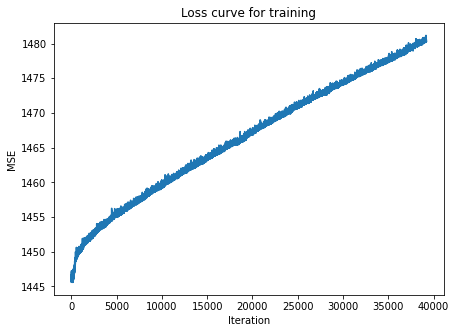

In [89]:
#Plot the loss curve

plt.figure(figsize=(7,5))
plt.plot(range(len(train_loss)), train_loss)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Loss curve for training")
plt.show()

In [90]:
save_model = True
if save_model is True:
    torch.save(model.state_dict(), 'housing_FNN_pytorch_D_l1.pkl')# only save parameters